In [9]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

import skimage.io 

import os

from joblib import Parallel, delayed
from math import sqrt
import pandas as pd


In [10]:
#Load the images and the segmentation
def getImagesAndSegmentations(path):
    folder_path = path
    # Get a list of all files in the folder
    file_names = os.listdir(folder_path)
    file_names.sort()
    # Load all images from the folder
    # Arrays to store images and segmentations
    image_array = []
    segmentation_array = []
    
    # Load images and segmentations
    for i in range(len(file_names)):
        file_name = file_names[i]
        
        # Check if the file is a segmentation
        if file_name.endswith('_seg.jpg') or file_name.endswith('_seg.png'):
            # Load the segmentation
            seg = skimage.io.imread(os.path.join(folder_path, file_name))
            segmentation_array[-1] = [file_name,seg]
        else:
            # Load the image
            img = skimage.io.imread(os.path.join(folder_path, file_name))
            image_array.append([file_name, img])
            # If segmentation doesn't exist, store -1
            segmentation_array.append(-1)
            
    return image_array, segmentation_array

def otsuSegmentation(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply Otsu's thresholding
    _, segmented_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Assuming arr is your NumPy array
    arr = np.array(segmented_image)
    
    # Replace 255 with 0 and 0 with 1
    segmented_image = np.where(arr == 255, 0, 1)
    
    return np.array(segmented_image).astype('uint8')

def dice_coef(seg1, seg2, orig):
        if seg1.shape != seg2.shape:
            raise ValueError("Shape mismatch: img and img2 must have to be of the same shape.")
        else:
            result = cv2.bitwise_and(orig, orig, mask=seg1)
            result2 = cv2.bitwise_and(orig, orig, mask=seg2)

            lenIntersection=0
            
            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    if ( np.array_equal(result[i][j],result2[i][j]) ):
                        lenIntersection+=1
             
            lenimg=result.shape[0]*result.shape[1]
            lenimg2=result2.shape[0]*result2.shape[1]  
            value = (2. * lenIntersection  / (lenimg + lenimg2))
        return value


In [11]:


#n_jobs=-2
#Parallel(n_jobs=-2, verbose=1)(delayed(sqrt)(i**2) for i in range(10))

# to create the .csv file in the format of SubmissionTest ###############
#data = [
#    {"ID": "ISIC_0055289", "CLASS": 8},
#    {"ID": "ISIC_0062682", "CLASS": 2},
#    {"ID": "ISIC_0057706", "CLASS": 5}
#]
#
## File path for the CSV file (in the same folder as the script)
#csv_file_path = "data.csv"
#
## Writing data to the CSV file
#with open(csv_file_path, mode='w', newline='') as file:
#    writer = csv.DictWriter(file, fieldnames=["ID", "CLASS"])
#    writer.writeheader()
#    for row in data:
#        writer.writerow(row)
#
#print(f"CSV file '{csv_file_path}' created successfully.")

#############################################################################

# Load images

#img_star          = skimage.io.imread('../data/Train/Train/ISIC_0000000.jpg')
#img_star_s          = skimage.io.imread('../data/Train/Train/ISIC_0000000_seg.png')

            
# Path to the folder containing the images
train_folder_path = '../data/Train/Train/'
train_images, train_seg = getImagesAndSegmentations(train_folder_path)
test_folder_path = '../data/Test/Test/'
test_images, test_seg = getImagesAndSegmentations(test_folder_path)

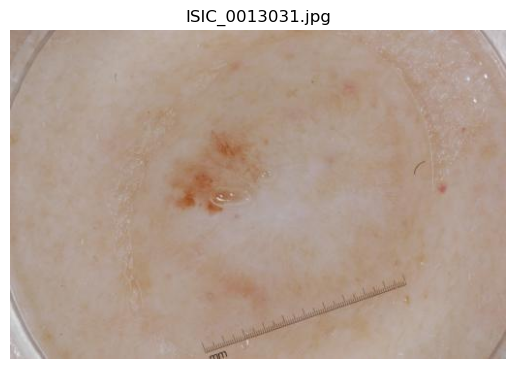

['ISIC_0013031_seg.png', array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


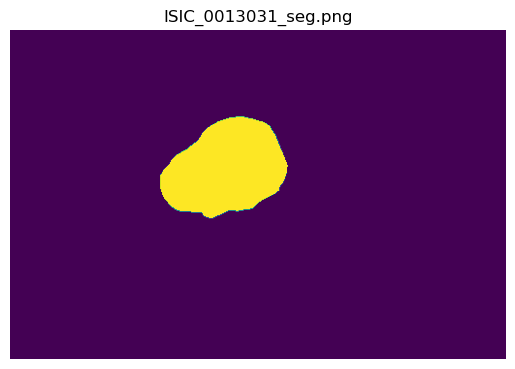

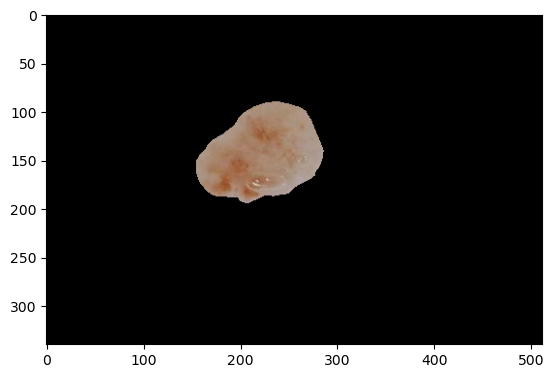

In [12]:
# Extract the first column using list comprehension
first_column = [row[0] for row in train_images]
index_of_a = first_column.index('ISIC_0013031.jpg')
plt.imshow(train_images[index_of_a][1])  # cmap='gray' displays the image in grayscale
plt.axis('off')  # Turn off axis
plt.title(train_images[index_of_a][0])  # Set title
plt.show()

print(train_seg[index_of_a])
plt.imshow(train_seg[index_of_a][1])  # cmap='gray' displays the image in grayscale
plt.axis('off')  # Turn off axis
plt.title(train_seg[index_of_a][0])  # Set title
plt.show()

result = cv2.bitwise_and(train_images[index_of_a][1], train_images[index_of_a][1], mask=train_seg[index_of_a][1])
plt.imshow(result)
plt.show()


In [13]:
# Convert the DataFrame to a numpy array
#metadata_array = metadata_df.values

# Assuming code.ipynb is in the code folder and you want to access data.csv in the data folder
metaDataTest = pd.read_csv('../data/metadataTest.csv')
metaDataTest = metaDataTest.sort_values('ID')

# Assuming code.ipynb is in the code folder and you want to access data.csv in the data folder
metaDataTrain = pd.read_csv('../data/metadataTrain.csv')
metaDataTrain = metaDataTrain.sort_values('ID')
# Sort the metadata array by the ID column (first column)
first_row = metaDataTrain.iloc[index_of_a]  # Extract the first row using iloc
print(first_row[0])

#print(len(metaDataTrain))
#print(len(train_images))
#print(len(train_seg))
#print(len(metaDataTest))
#print(len(test_images))
#print(len(test_seg))

ISIC_0013031


/tmp/ipykernel_1896898/3741646722.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(first_row[0])


In [14]:
#def segmentate(i):
#    global total_dice_score, num_segmented_images
#    # Check if segmentation mask exists
#    if train_seg[i] != -1:
#        # Perform Otsu's segmentation on the corresponding image
#        segmented_image = otsuSegmentation(train_images[i][1])
#        segmented_images.append(cv2.bitwise_and(train_images[i][1], train_images[i][1], mask=train_seg[i][1]))
#        # Calculate Dice score
#        dice_score = dice_coef(train_seg[i][1], segmented_image, train_images[i][1])
#        # Accumulate the total score
#        total_dice_score += dice_score
#        # Increment the count of segmented images
#        num_segmented_images += 1
#    else:
#        segmented_image = otsuSegmentation(train_images[i][1])
#        segmented_images.append(cv2.bitwise_and(train_images[i][1], train_images[i][1], mask=segmented_image))
#
##this function will both calculate the segmentations and store them in segmented_images
##and at the end calculate the dice score
#def calculateAverageDice():
#	# Loop through train_seg to calculate Dice score for images with segmentations
#    Parallel(n_jobs=-2, require='sharedmem', verbose=1)(delayed(segmentate)(i) for i in range(len(train_seg)))
#    # Loop through train_seg to calculate Dice score for images with segmentations
#    #for i in range(len(train_seg)):
#    #    segmentate(i)
#    
#    # Calculate the average Dice score
#    if num_segmented_images > 0:
#        average_dice_score = total_dice_score / num_segmented_images
#    else:
#        average_dice_score = 0
#    return average_dice_score

## Segmentation

Dice similarity coefficient: 0.9322101272015656


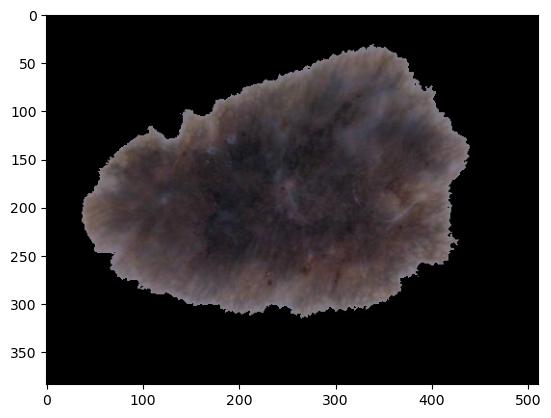

Average Dice Score: 0.846433494882943


In [15]:
# Plot the segmented image
#plt.imshow(train_seg[0][1], cmap='gray')
#plt.title('Original seg Image')
#plt.axis('off')  # Turn off axis
#plt.show()
#
## Plot the segmented image
#plt.imshow(segmented_image, cmap='gray')
#plt.title('Segmented Image')
#plt.axis('off')  # Turn off axis
#plt.show()

segmented_image = otsuSegmentation(train_images[0][1])

dice_score = dice_coef(train_seg[0][1], segmented_image, train_images[0][1])
print("Dice similarity coefficient:", dice_score)

result = cv2.bitwise_and(train_images[0][1], train_images[0][1], mask=segmented_image)
result2 = cv2.bitwise_and(train_images[0][1], train_images[0][1], mask=train_seg[0][1])


plt.imshow(result)
plt.show()


#def get_segmentation(value):
#        return [value*2]
#
#def joblib_segmentation(values):
#    return Parallel(n_jobs=-2, verbose=1)(delayed(get_segmentation)(image) for image in values)
#
#values = [1,2,3,4,5]
#
##Apply the Chan-Vese segmentation to the images
#train_images = joblib_segmentation(values)

#this function will both calculate the segmentations and store them in segmented_images
#and at the end calculate the dice score
segmented_images = []

def calculateAverageDice():
    # Initialize variables for calculating the average Dice score
    total_dice_score = 0
    num_segmented_images = 0
    
    # Loop through train_seg to calculate Dice score for images with segmentations
    for i in range(len(train_seg)):
        # Check if segmentation mask exists
        if train_seg[i] != -1:
            # Perform Otsu's segmentation on the corresponding image
            segmented_image = otsuSegmentation(train_images[i][1])
            segmented_images.append(cv2.bitwise_and(train_images[i][1], train_images[i][1], mask=train_seg[i][1]))
            # Calculate Dice score
            dice_score = dice_coef(train_seg[i][1], segmented_image, train_images[i][1])
            # Accumulate the total score
            total_dice_score += dice_score
            # Increment the count of segmented images
            num_segmented_images += 1
        else:
            segmented_image = otsuSegmentation(train_images[i][1])
            segmented_images.append(cv2.bitwise_and(train_images[i][1], train_images[i][1], mask=segmented_image))
    
    # Calculate the average Dice score
    if num_segmented_images > 0:
        average_dice_score = total_dice_score / num_segmented_images
    else:
        average_dice_score = 0
    return average_dice_score

def joblib_segmentation():
    return Parallel(n_jobs=-2, verbose=1)(delayed(calculateAverageDice)() )


average_dice_score = calculateAverageDice()
#average_dice_score = joblib_segmentation()
print("Average Dice Score:", average_dice_score)

In [16]:
print("Average Dice Score:", average_dice_score)

Average Dice Score: 0.846433494882943


In [17]:
print(len(segmented_images))

18998


### Calculating ABCD

## Classification

In [30]:
#for now we'll use train_images but later we corrected to use the already segmented images that are in the array
#segmented images
print(len(train_images))

#only taking the class of each image which is its second column in the file metadataTrain.csv
classes_train = metaDataTrain.iloc[:, 1]
print(classes_train[4])
unique_classes = classes_train.unique()
num_classes = len(unique_classes)
print("Number of unique classes:", num_classes)


18998
8
Number of unique classes: 8
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
9


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm

# Define a common size for resizing the images
target_size = (500, 300)  # Adjust this size as needed

# Extract image names and image data separately
image_names, image_data = zip(*train_images)

# Convert image data to numpy array and resize
resized_images = []
for image in tqdm(image_data):
    # Load the image
    #img = load_img(image)
    # Resize the image
    resized_img = cv2.resize(image, target_size)
    # Append to resized_images list
    resized_images.append(resized_img)

# Convert lists to numpy arrays
X_r = np.array(resized_images)
y = to_categorical(classes_train-1, num_classes=num_classes)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_r, y, test_size=0.2, random_state=42)

# Define image dimensions
image_height, image_width, image_channels = X_train[0].shape

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

print('The model was properly defined')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

number_epochs = 3

# Train the model
model.fit(X_train, y_train, epochs=number_epochs, batch_size=32, validation_data=(X_val, y_val))


100%|██████████| 18998/18998 [00:09<00:00, 1945.89it/s]
/home/infres/cchavez-23/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


The model was properly defined
Epoch 1/3
475/475 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.4753 - loss: 88.1688 - val_accuracy: 0.5205 - val_loss: 1.4102
Epoch 2/3
475/475 ━━━━━━━━━━━━━━━━━━━━ 731s 2s/step - accuracy: 0.5217 - loss: 1.4161 - val_accuracy: 0.5182 - val_loss: 1.4068
Epoch 3/3
475/475 ━━━━━━━━━━━━━━━━━━━━ 722s 2s/step - accuracy: 0.5455 - loss: 1.3537 - val_accuracy: 0.5213 - val_loss: 1.4019


In [33]:
#this function will both calculate the segmentations and store them in segmented_images
#and at the end calculate the dice score
segmented_test_images = []

def calculateAverageDiceTest():
    # Initialize variables for calculating the average Dice score
    total_dice_score = 0
    num_segmented_images = 0
    
    # Loop through test_seg to calculate Dice score for images with segmentations
    for i in range(len(test_seg)):
        # Check if segmentation mask exists
        if test_seg[i] != -1:
            # Perform Otsu's segmentation on the corresponding image
            segmented_image = otsuSegmentation(test_images[i][1])
            segmented_test_images.append(cv2.bitwise_and(test_images[i][1], test_images[i][1], mask=test_seg[i][1]))
            # Calculate Dice score
            dice_score = dice_coef(test_seg[i][1], segmented_image, test_images[i][1])
            # Accumulate the total score
            total_dice_score += dice_score
            # Increment the count of segmented images
            num_segmented_images += 1
        else:
            segmented_image = otsuSegmentation(test_images[i][1])
            segmented_test_images.append(cv2.bitwise_and(test_images[i][1], test_images[i][1], mask=segmented_image))
    
    # Calculate the average Dice score
    if num_segmented_images > 0:
        average_dice_score = total_dice_score / num_segmented_images
    else:
        average_dice_score = 0
    return average_dice_score


average_dice_testscore = calculateAverageDiceTest()
print(average_dice_testscore)

0.8492443837935374
